In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [9]:
df = pd.read_csv('/Users/andrewcosta/Desktop/Autodidactism/Python/data science/Raw Data/streeteasy.csv')

In [10]:
df = pd.DataFrame(df)

In [11]:
df.head()

,rental_id,building_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,neighborhood,submarket,borough
0,1545,44518357,2550,0.0,1,480,9,2.0,17,1,1,0,0,1,1,0,1,Upper East Side,All Upper East Side,Manhattan
1,2472,94441623,11500,2.0,2,2000,4,1.0,96,0,0,0,0,0,0,0,0,Greenwich Village,All Downtown,Manhattan
2,10234,87632265,3000,3.0,1,1000,4,1.0,106,0,0,0,0,0,0,0,0,Astoria,Northwest Queens,Queens
3,2919,76909719,4500,1.0,1,916,2,51.0,29,0,1,0,1,1,1,0,0,Midtown,All Midtown,Manhattan
4,2790,92953520,4795,1.0,1,975,3,8.0,31,0,0,0,1,1,1,0,1,Greenwich Village,All Downtown,Manhattan


In [12]:
df.describe()

,rental_id,building_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym
count,5000.000000,5.000000e+03,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,5526.909400,5.122007e+07,4536.920800,1.395700,1.321600,920.101400,5.079200,10.190200,52.093200,0.429600,0.12860,0.133800,0.228000,0.240000,0.155600,0.045600,0.143800
std,3263.692417,2.802283e+07,2929.838953,0.961018,0.565542,440.150464,5.268897,10.565361,40.224501,0.495069,0.33479,0.340471,0.419585,0.427126,0.362512,0.208637,0.350922
min,1.000000,7.107000e+03,1250.000000,0.000000,0.000000,250.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2699.750000,2.699811e+07,2750.000000,1.000000,1.000000,633.000000,2.000000,3.000000,12.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5456.500000,5.069894e+07,3600.000000,1.000000,1.000000,800.000000,4.000000,6.000000,44.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8306.000000,7.572064e+07,5200.000000,2.000000,2.000000,1094.000000,6.000000,14.000000,89.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,11349.000000,9.998721e+07,20000.000000,5.000000,5.000000,4800.000000,51.000000,83.000000,180.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
# gather data
x = df[['bedrooms', 'bathrooms', 'size_sqft', 'min_to_subway', 'floor', 'building_age_yrs', 'no_fee', 'has_roofdeck', 'has_washer_dryer', 'has_doorman', 'has_elevator', 'has_dishwasher', 'has_patio', 'has_gym']]
y = df[['rent']]
sonny_apartment = [[1, 1, 620, 16, 1, 98, 1, 0, 1, 0, 0, 1, 1, 0]]

In [14]:
# split data into test and train
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2, random_state=6)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(4000, 14)
(1000, 14)
(4000, 1)
(1000, 1)


In [22]:
# create model
mlr = LinearRegression()
mlr.fit(x_train, y_train)
y_predict = mlr.predict(x_test)

# create xgboost model
import xgboost as xgb
xg_model = xgb.DMatrix(data=x_train,label=y_train)
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)
xg_reg.fit(x_train,y_train)

y_predict_xg = xg_reg.predict(x_test)

[15:31:39] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


In [23]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, y_predict_xg))
print("RMSE: %f" % (rmse))

RMSE: 2456.326314


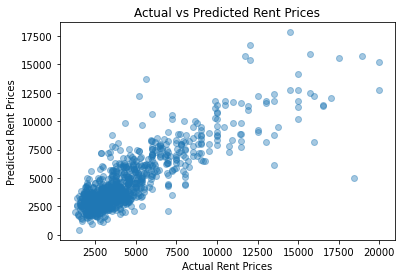

In [24]:
# plot
plt.scatter(y_test, y_predict, alpha=0.4)
plt.xlabel('Actual Rent Prices')
plt.ylabel('Predicted Rent Prices')
plt.title('Actual vs Predicted Rent Prices')
plt.show()

In [25]:
print('coef:', mlr.coef_)
print('------------------------------------------------------------')
print('intercept:', mlr.intercept_)
print('------------------------------------------------------------')
rmse_mlr = np.sqrt(mean_squared_error(y_test, y_predict))
print("RMSE: %f" % (rmse_mlr))

coef: [[-461.17539618 1278.6000335     4.81900428  -14.94950189   38.70966963
    -4.52297793  -90.26769009   90.64556132  196.97409914  -41.5462096
   224.20724181    9.0336051    24.12310573  -86.37764952]]
------------------------------------------------------------
intercept: [-1042.5849714]
------------------------------------------------------------
RMSE: 1497.537996


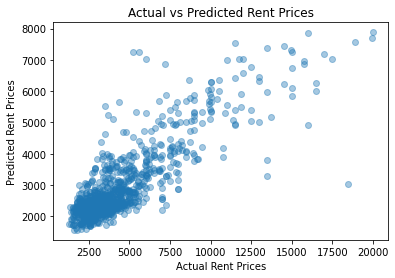

In [26]:
# plot XGB
plt.scatter(y_test, y_predict_xg, alpha=0.4)
plt.xlabel('Actual Rent Prices')
plt.ylabel('Predicted Rent Prices')
plt.title('Actual vs Predicted Rent Prices')
plt.show()

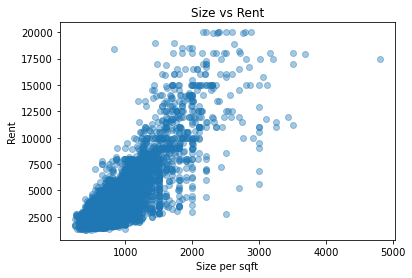

In [24]:
# finding a correlation between size and rent
plt.scatter(df[['size_sqft']], df[['rent']], alpha=0.4)
plt.xlabel('Size per sqft')
plt.ylabel('Rent')
plt.title('Size vs Rent')
plt.show()

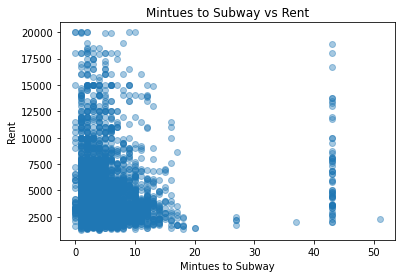

In [27]:
# finding a correlation between minutes to subway and rent
plt.scatter(df[['min_to_subway']], df[['rent']], alpha=0.4)
plt.xlabel('Mintues to Subway')
plt.ylabel('Rent')
plt.title('Mintues to Subway vs Rent')
plt.show()

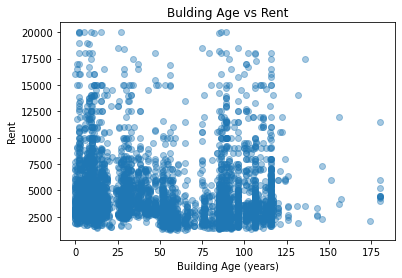

In [29]:
plt.scatter(df[['building_age_yrs']], df[['rent']], alpha=0.4)
plt.xlabel('Building Age (years)')
plt.ylabel('Rent')
plt.title('Bulding Age vs Rent')
plt.show()

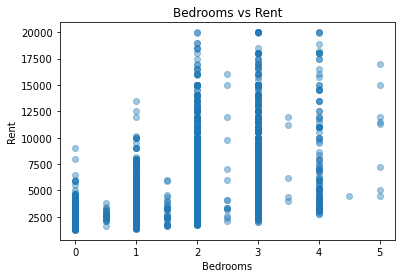

In [32]:
# bedrooms vs rent
plt.scatter(df[['bedrooms']], df[['rent']], alpha=0.4)
plt.xlabel('Bedrooms')
plt.ylabel('Rent')
plt.title('Bedrooms vs Rent')
plt.show()

In [41]:
# calculate scores
train_score = mlr.score(x_train, y_train)
print(f'Train score is {train_score}.')

test_score = mlr.score(x_test, y_test)
print(f'Test score is {test_score}')

Train score is 0.7349688159822418.
Test score is 0.7158565217228285


In [58]:
# train new model
new_x = df[['bathrooms', 'min_to_subway', 'floor', 'building_age_yrs', 'has_roofdeck', 'has_washer_dryer', 'has_doorman', 'has_elevator', 'has_dishwasher', 'has_patio', 'has_gym']]
new_y = df[['rent']]

x_train, x_test, y_train, y_test = train_test_split(new_x, new_y, train_size=0.8, test_size=0.2, random_state=6)

In [59]:
# build model
new_mlr = LinearRegression()
new_mlr.fit(x_train, y_train)
new_y_predict = new_mlr.predict(x_test)

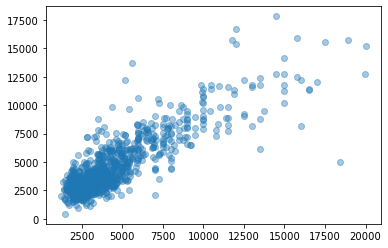

In [60]:
plt.scatter(y_test, y_predict, alpha=0.4)
plt.show()

In [61]:
new_score = new_mlr.score(x_test, y_test)
print(f'New score is {new_score}')

"""
Correlation has become worse as we remove more variables from our data
"""

New score is 0.6111214765261732
